<a href="https://colab.research.google.com/github/life-ofpi/2024_DL/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##60212407 이진서
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
#Linearly separable / 2d binary class (𝑥1, 𝑥2, 𝑦)를 가지고 있는 서로 다른 data point class 별로 100개씩 생성하고 랜덤하게 70%는 train / 30%는 test셋으로 분리
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 생성
np.random.seed(0)
class1 = np.random.randn(100, 2) + np.array([0, -1])
class2 = np.random.randn(100, 2) + np.array([2, 2])
X = np.vstack((class1, class2))
y = np.hstack((np.zeros(100), np.ones(100)))

# 데이터 셔플 및 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


<ipython-input-4-045d4aea2109>:5: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', label='Test')


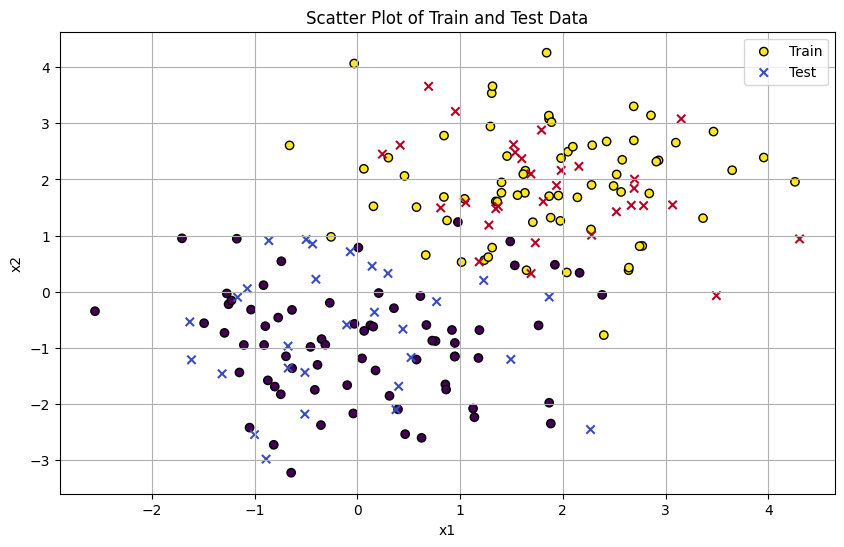

In [4]:
#2d visualization을 통하여 실제로 linearly separable한 data인지 확인 할 수 있는 scatter plot 생성
# 생성된 데이터 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', label='Test')
plt.legend()
plt.title("Scatter Plot of Train and Test Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


In [5]:
#training data를 사용하여 perceptron을 training 하고 train accuracy / test accuracy 작성
# Perceptron 구현
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=10):
        self.lr = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0

        for _ in range(self.n_iter):
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w += update * xi
                self.b += update

    def net_input(self, X):
        return np.dot(X, self.w) + self.b

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

# Perceptron 학습
perceptron = Perceptron(learning_rate=0.01, n_iter=10)
perceptron.fit(X_train, y_train)

# Train accuracy
y_train_pred = perceptron.predict(X_train)
train_accuracy = np.mean(y_train_pred == y_train)

# Test accuracy
y_test_pred = perceptron.predict(X_test)
test_accuracy = np.mean(y_test_pred == y_test)

print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Train Accuracy: 95.00%
Test Accuracy: 96.67%


<ipython-input-6-06ffda927903>:14: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', label='Test')


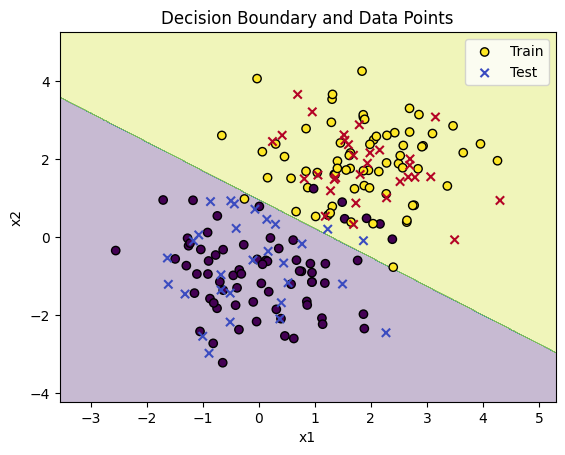

In [6]:
#perceptron의 decision boundary와 data를 2d상에서 확인 할 수 있도록 plot 생성

# 결정 경계 그리기
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='k', label='Train')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', label='Test')
    plt.legend()
    plt.title("Decision Boundary and Data Points")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

# 결정 경계 및 데이터 시각화
plot_decision_boundary(X, y, perceptron)


In [19]:
from sklearn.preprocessing import StandardScaler

#XOR 형태의 Nonlinearly separable 2d binary class를 가지고 있는 서로 다른 data point class 별로 100개씩 생성하고 랜덤하게 70%는 train / 30%는 test 셋으로 분리
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# XOR 데이터 생성
np.random.seed(0)
class1 = np.random.randn(50, 2) + np.array([0, 0])
class2 = np.random.randn(50, 2) + np.array([1, 1])
class3 = np.random.randn(50, 2) + np.array([1, 0])
class4 = np.random.randn(50, 2) + np.array([0, 1])

X = np.vstack((class1, class2, class3, class4))
y = np.hstack((np.zeros(100), np.ones(100)))

# 데이터 셔플 및 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



<ipython-input-20-85d48a11c9d8>:5: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', label='Test')


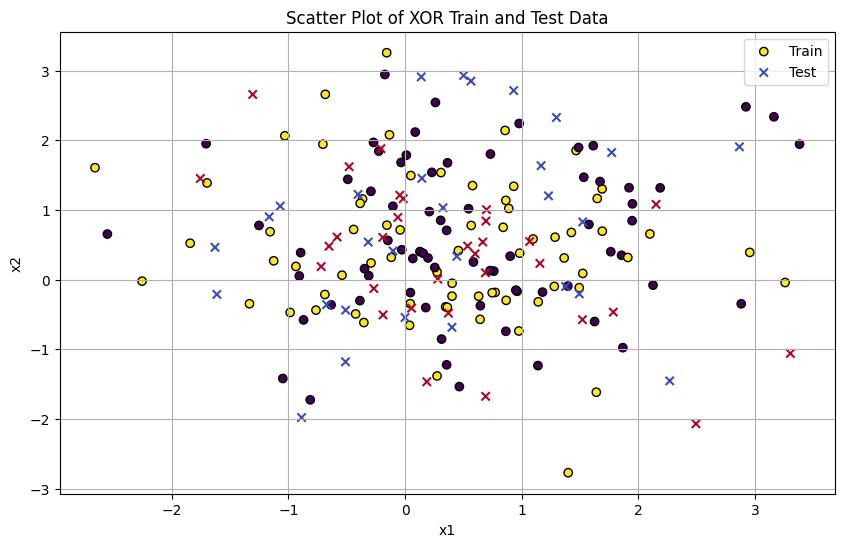

In [20]:
# – 2d visualization을 통하여 실제로 linearly separable한 data인지 확인 할 수 있는 plot 생성
# 생성된 데이터 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', label='Test')
plt.legend()
plt.title("Scatter Plot of XOR Train and Test Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


In [17]:
#training data를 사용하여 위에서 구현한 perceptron으로 training 하고 train / test accuracy 작성
# Perceptron 학습
perceptron = Perceptron(learning_rate=0.01, n_iter=10)
perceptron.fit(X_train, y_train)

# Train accuracy
y_train_pred = perceptron.predict(X_train)
train_accuracy = np.mean(y_train_pred == y_train)

# Test accuracy
y_test_pred = perceptron.predict(X_test)
test_accuracy = np.mean(y_test_pred == y_test)

print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Train Accuracy: 54.29%
Test Accuracy: 61.67%


In [22]:
#pytorch를 사용하여 Logistic regression / MLP를 구현하여 training data를 사용하여 training하고 train / test accuracy 작성
# 데이터를 PyTorch Tensor로 변환
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

# Logistic Regression 모델 정의
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# MLP 모델 정의 (2개의 hidden layer, 각각 10개의 뉴런)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(2, 10)
        self.hidden2 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        return torch.sigmoid(self.output(x))

# 모델 학습 함수
def train_model(model, X_train, y_train, X_test, y_test, epochs=2000, lr=0.01):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        train_outputs = model(X_train)
        test_outputs = model(X_test)
        train_pred = (train_outputs >= 0.5).float()
        test_pred = (test_outputs >= 0.5).float()
        train_accuracy = (train_pred == y_train).float().mean()
        test_accuracy = (test_pred == y_test).float().mean()

    return train_accuracy.item(), test_accuracy.item()

# Logistic Regression 모델 학습 및 평가
logistic_model = LogisticRegression()
logistic_train_acc, logistic_test_acc = train_model(logistic_model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)

print(f'Logistic Regression - Train Accuracy: {logistic_train_acc * 100:.2f}%')
print(f'Logistic Regression - Test Accuracy: {logistic_test_acc * 100:.2f}%')

# MLP 모델 학습 및 평가
mlp_model = MLP()
mlp_train_acc, mlp_test_acc = train_model(mlp_model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)

print(f'MLP - Train Accuracy: {mlp_train_acc * 100:.2f}%')
print(f'MLP - Test Accuracy: {mlp_test_acc * 100:.2f}%')


Logistic Regression - Train Accuracy: 57.86%
Logistic Regression - Test Accuracy: 48.33%
MLP - Train Accuracy: 81.43%
MLP - Test Accuracy: 53.33%


<ipython-input-31-235501fb6d00>:44: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', label='Test')


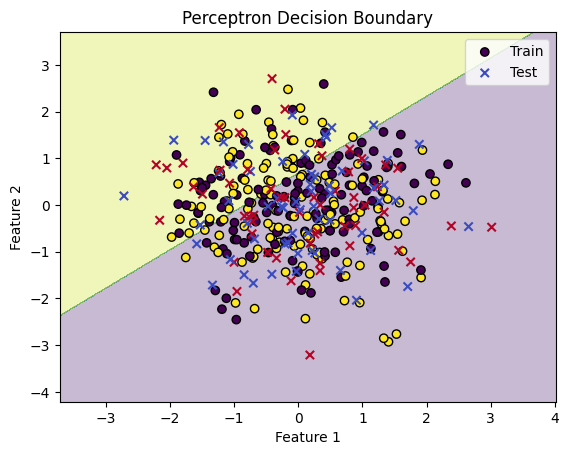

<ipython-input-31-235501fb6d00>:44: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', label='Test')


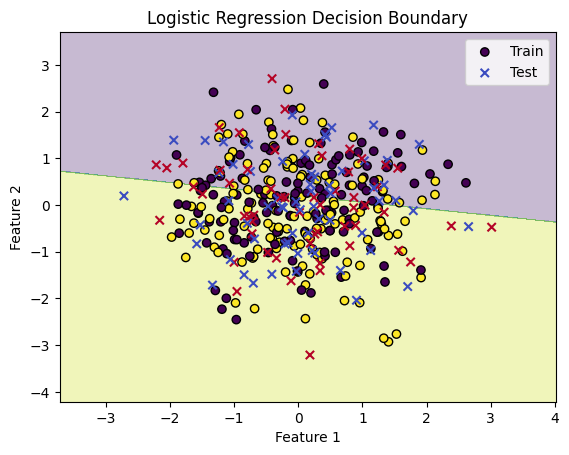

In [31]:
# Perceptron 및 로지스틱 회귀 모델의 결정 경계 시각화
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# XOR 형태의 Nonlinearly separable 2d binary class 데이터 생성
np.random.seed(0)
class1 = np.random.randn(100, 2) + np.array([0, 0])
class2 = np.random.randn(100, 2) + np.array([1, 1])
class3 = np.random.randn(100, 2) + np.array([1, 0])
class4 = np.random.randn(100, 2) + np.array([0, 1])

X = np.vstack((class1, class2, class3, class4))
y = np.hstack((np.zeros(200), np.ones(200)))

# 데이터 표준화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 셔플 및 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Perceptron 모델 학습
perceptron = Perceptron(max_iter=1000, tol=1e-3)
perceptron.fit(X_train, y_train)

# Logistic Regression 모델 학습
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# 결정 경계 시각화 함수
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # 여기서 predict 메서드 사용
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='k', label='Train')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', label='Test')
    plt.legend()
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Perceptron 결정 경계 시각화
plot_decision_boundary(perceptron, X, y, "Perceptron Decision Boundary")

# Logistic Regression 결정 경계 시각화
plot_decision_boundary(logistic_regression, X, y, "Logistic Regression Decision Boundary")


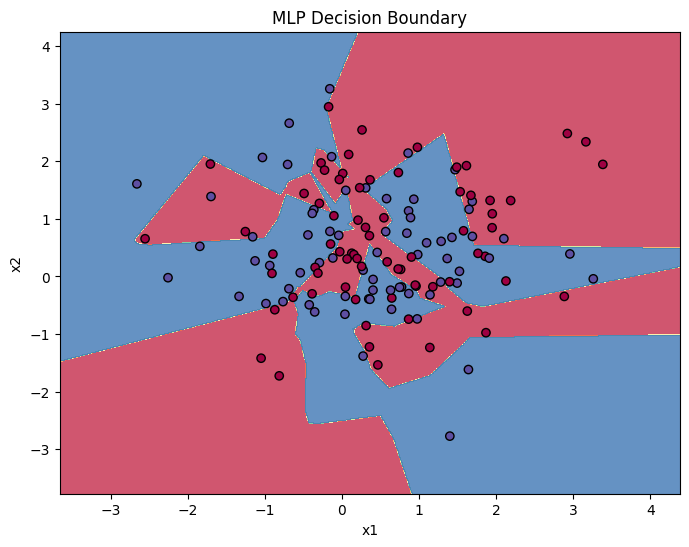

In [33]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    with torch.no_grad():
        Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
    Z = Z.reshape(xx.shape).detach().numpy().round()

    # 컨투어 플롯으로 결정 경계 생성
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

# MLP 모델 결정 경계
plt.figure(figsize=(8, 6))
plot_decision_boundary(mlp_model, X_train_tensor, y_train_tensor, "MLP Decision Boundary")
plt.show()
